First Name:Yuvan Bharathi

Last Name: Kokhila Shanmugam

K letter - function =  f(x)=1x+ex accuracy = 0.005

In [ ]:
import scipy.optimize as spo
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

Function is Unimodal or Not?

In [ ]:
def f(x):
  fx=np.reciprocal(x) + np.exp(x)
  return fx

In [ ]:
x_start=0.5
result= spo.minimize(f,x_start)
print(f"x= {result.x} and y={result.fun}")
x_min=result.x
fx_min=result.fun

x= [0.70346746] and y=3.4422772944949793


In [ ]:
a1=0.5
a2=1
x = np.arange(a1, a2, 0.005)
fx=[]

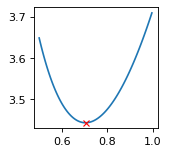

In [ ]:
for i in x:
  fx.append(f(i))
figure(figsize=(2,2),dpi=80)
plt.plot(x,fx)
plt.plot(x_min, fx_min, '-x',color='red');

Thus, the function is Unimodal

1) Uniform Section Method

Algorithm:

  1) Set upper and lower limts

  2) Set accuracy and no. of divisions

  3) Define x, fx and no. of iterations
  
  4) Find the x_min and fx_min

  5) Plot the graph for different values of divisions and obtain the results

In [ ]:
def uniform(h):
  a=0.5
  b=1
  iter = 0
  xl = []
  while (abs(a-b)> 0.005):
    yl = []
    xl= np.arange(a, b, (abs(a-b) /h))
    iter += 1
    for num in xl:
      yl.append(f(num))
    yl_min = np.amin(yl)
    xl_min = xl[np.argmin(yl)]
    print('i=',iter,'x=',xl_min,'y=',yl_min)  
    if (np.argmin(yl) - 1 > 0):
      a = xl[np.argmin(yl) - 1]
    if (np.argmin(yl) + 1 < len(xl) - 1):
      b = xl[np.argmin(yl) + 1] 
  return i, xl_min, yl_min

In [ ]:
i5,x5,y5=uniform(5)

i= 1 x= 0.7 y= 3.442324136041905
i= 2 x= 0.7200000000000001 y= 3.443322099532777
i= 3 x= 0.7040000000000001 y= 3.4422783952780898
i= 4 x= 0.6992000000000002 y= 3.4423482991903116
i= 5 x= 0.7049600000000004 y= 3.4422859324016506
i= 6 x= 0.7041920000000003 y= 3.4422793316565206


In [ ]:
i10,x10,y10=uniform(10)

i= 1 x= 0.7000000000000002 y= 3.442324136041905
i= 2 x= 0.7000000000000002 y= 3.442324136041905
i= 3 x= 0.7040000000000002 y= 3.44227839527809


In [ ]:
i25,x25,y25=uniform(25)

i= 1 x= 0.7000000000000002 y= 3.442324136041905
i= 2 x= 0.7040000000000008 y= 3.4422783952780898


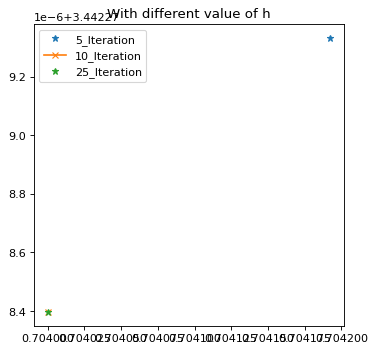

In [ ]:
figure(figsize=(5,5),dpi=80)
plt.plot(x5, y5,'*',label='5_Iteration')
plt.plot(x10, y10,'-x',label='10_Iteration')
plt.plot(x25, y25,'*',label='25_Iteration')
plt.title('With different value of h');
plt.legend();

Dichotomy

Algorithm:

1) Set upper and lower limts

2) Set the accuracy value

3) Iterate the value of l and r untill it attains the accuracy

4) Calculate the number of iterations and also set l and r as minimum points

In [ ]:

def dichotomy(acc):
  m = 0.5
  n = 1
  i_d=0
  while (np.round(n - m, 4) > acc):
    i_d=i_d+1
    print(i_d,m,n)
    
    avg = (m+n)/2
    l = avg - acc / 2
    r = avg + acc / 2
    if f(l) > f(r):
      m = l
    else:
      n =r
  print('Total Number of iterations:' , i_d)


In [ ]:
dichotomy(0.001)



1 0.5 1
2 0.5 0.7505
3 0.62475 0.7505
4 0.687125 0.7505
5 0.687125 0.7193124999999999
6 0.7027187500000001 0.7193124999999999
7 0.7027187500000001 0.7115156249999999
8 0.7027187500000001 0.7076171874999999
9 0.7027187500000001 0.7056679687499999
10 0.7027187500000001 0.704693359375
11 0.7027187500000001 0.7042060546875
12 0.7029624023437501 0.7042060546875
13 0.7029624023437501 0.704084228515625
14 0.7029624023437501 0.7040233154296875
Total Number of iterations: 14


In [ ]:
i_d=14

Golden Section Method:

Algorithm:

1) Set the upper and lower limts.

2) Assign the Golden section ratio and accuracy.

3) Take number of iterations.

4) Assign c and d with the limits and reduce the limits in every iterations.

5)Shorten the length between the limits untill it reaches less than the accuracy level.

6) Once they reachthe accuracy level, Stop the process and take the mean of m and n and assign them as the minimum value of x aswell as , find function of x(f(x)) and that is the minimum vale of f(x)

In [ ]:
m=0.5
n=1
acc=0.001
g=0.618
c=n-g*(abs(m-n))
d=m+g*(abs(m-n))
i_g=0
fc=f(c)
fd=f(d)
while True:
  i_g=i_g+1
  if (abs(m-n)<acc):
    x=(m+n)/2
    break
  if(fc<fd):
    m=m
    n=d
    d=c
    fd=fc
    c=n-g*(n-m)
    fc=f(c)
  else:
    n=n
    m=c
    c=d
    fc=fd
    d=m+g*(n-m)
    fd=f(d)
    yd=f(x)
print('i=',i_g,'x=',x,yd)

i= 14 x= 0.7036585387863934 3.442277436294412


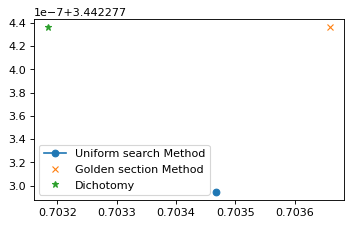

In [ ]:
figure(figsize=(5,3),dpi=80)
plt.plot(x_min, fx_min, '-o', label='Uniform search Method')
plt.plot(x, yd, 'x', label='Golden section Method')
plt.plot(m,yd, '*', label='Dichotomy')
plt.legend();

In [ ]:
print("Unifrom Section Method no. of iterations:",iter)
print("Dichotomy Method no. of iterations:",i_d)
print("Golden Section Method no. of iterations:",i_g)

Unifrom Section Method no. of iterations: <built-in function iter>
Dichotomy Method no. of iterations: 14
Golden Section Method no. of iterations: 14
